# 1) Problem statement.
"Trips & Travel.com" company wants to enable and establish a viable business model to expand
the customer base. One of the ways to expand the customer base is to introduce a new offering of
packages. Currently, there are 5 types of packages the company is offering *Basic, Standard,
Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the
customers purchased the packages! However, the marketing cost was quite high because
customers were contacted at random without looking at the available information. The company is
now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined
as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support
or increase one's sense of well-being. However, this time company wants to harness the availa
data of existing and potential customers to make the marketing expenditure more efficient.
# 2) Data Collection.
The Dataset is collected from https://www.kaggle.com/datasets/susant4learning/holiday
purchase-prediction The data consists of 20 column and 4888 rows.

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("susant4learning/holiday-package-purchase-prediction")

print("Path to dataset files:", path)

100%|██████████| 79.6k/79.6k [00:00<00:00, 29.0MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/susant4learning/holiday-package-purchase-prediction/versions/1


In [2]:
import os
files = os.listdir(path)
print(files)

['Travel.csv']


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [4]:
df = pd.read_csv(path +'/Travel.csv')
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


# data cleaning

In [5]:
df.isna().sum()

,0
CustomerID,0
ProdTaken,0
Age,226
TypeofContact,25
CityTier,0
DurationOfPitch,251
Occupation,0
Gender,0
NumberOfPersonVisiting,0
NumberOfFollowups,45


In [6]:
df['Gender'].value_counts()

,count
Gender,
Male,2916
Female,1817
Fe Male,155


In [7]:
df['TypeofContact'].value_counts()

,count
TypeofContact,
Self Enquiry,3444
Company Invited,1419


In [8]:
df['Occupation'].value_counts()

,count
Occupation,
Salaried,2368
Small Business,2084
Large Business,434
Free Lancer,2


In [9]:
df['ProductPitched'].value_counts()

,count
ProductPitched,
Basic,1842
Deluxe,1732
Standard,742
Super Deluxe,342
King,230


In [10]:
df['MaritalStatus'].value_counts()

,count
MaritalStatus,
Married,2340
Divorced,950
Single,916
Unmarried,682


In [11]:
df['Designation'].value_counts()

,count
Designation,
Executive,1842
Manager,1732
Senior Manager,742
AVP,342
VP,230


In [12]:
df['Gender'] = df['Gender'].replace('Fe Male','Female')
df['MaritalStatus'] = df['MaritalStatus'].replace('Single','Unmarried')

In [13]:
# find missing values

features_with_na = [feature for feature in df.columns if df[feature].isnull().sum()>=1]

for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean()*100, 5),  ' % missing values')

Age 4.62357  % missing values
TypeofContact 0.51146  % missing values
DurationOfPitch 5.13502  % missing values
NumberOfFollowups 0.92062  % missing values
PreferredPropertyStar 0.53191  % missing values
NumberOfTrips 2.86416  % missing values
NumberOfChildrenVisiting 1.35025  % missing values
MonthlyIncome 4.76678  % missing values


In [14]:
#stats on numeric cols
df[features_with_na].select_dtypes(exclude='object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


In [15]:
# imputing null values
# mediean for age ; mode for type of contract ; median for duration of pitch ;
# mode for no. of followups as it is discrete; mode for preferredpropertystar ;
# median for no. of trips; mode for no. of children visitin; median for monthlyincome;

df['Age'].fillna(df['Age'].median(), inplace=True)
df['TypeofContact'].fillna(df['TypeofContact'].mode()[0], inplace=True)
df['DurationOfPitch'].fillna(df['DurationOfPitch'].median(), inplace=True)
df['NumberOfFollowups'].fillna(df['NumberOfFollowups'].mode()[0], inplace=True)
df['PreferredPropertyStar'].fillna(df['PreferredPropertyStar'].mode()[0], inplace=True)
df['NumberOfTrips'].fillna(df['NumberOfTrips'].median(), inplace=True)
df['NumberOfChildrenVisiting'].fillna(df['NumberOfChildrenVisiting'].median(), inplace=True)
df['MonthlyIncome'].fillna(df['MonthlyIncome'].median(), inplace=True)


<ipython-input-15-2b16d8341ea3>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-15-2b16d8341ea3>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [16]:
df.drop('CustomerID', axis=1, inplace=True)

# Feature engineering

#### feature extraction

In [17]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [18]:
# create new column for feature
df['TotalVisits'] = df['NumberOfChildrenVisiting'] + df['NumberOfPersonVisiting']
df.drop(['NumberOfChildrenVisiting', 'NumberOfPersonVisiting'], axis=1, inplace=True)

In [19]:
# get all numeric features
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('number of numerical features :',len(num_features))

number of numerical features : 12


In [20]:
# categorical features
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('number of categorical features :',len(cat_features))

number of categorical features : 6


In [21]:
# discrete features
discrete_features = [feature for feature in num_features if len(df[feature].unique())<25]
print('number of discrete features :',len(discrete_features))

number of discrete features : 9


In [22]:
# continuous features
continuous_features = [feature for feature in num_features if feature not in discrete_features]
print('number of continuous features :',len(continuous_features))

number of continuous features : 3


#### train test split

In [23]:
from sklearn.model_selection import train_test_split

X = df.drop(['ProdTaken'], axis=1)
y = df['ProdTaken']

In [24]:
y.value_counts()

,count
ProdTaken,
0,3968
1,920


In [25]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((3910, 17), (978, 17))

In [26]:
cat_features = X.select_dtypes(include='object').columns
num_features = X.select_dtypes(exclude='object').columns

In [27]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [28]:
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')

In [29]:
preprocessor = ColumnTransformer(
    transformers=[
        ('OneHotEncoder', categorical_transformer, cat_features),
        ('StandardScaler', numeric_transformer, num_features)
    ])

In [30]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [31]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.7214,-1.020350,1.284279,-0.725271,-0.127737,-0.632399,0.679690,0.782966,-0.382245,-0.774151
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,-0.7214,0.690023,0.282777,-0.725271,1.511598,-0.632399,0.679690,0.782966,-0.459799,0.643615
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.7214,-1.020350,0.282777,1.771041,0.418708,-0.632399,0.679690,0.782966,-0.245196,-0.065268
3,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,-0.7214,-1.020350,1.284279,-0.725271,-0.127737,-0.632399,1.408395,-1.277194,0.213475,-0.065268
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.7214,2.400396,-1.720227,-0.725271,1.511598,-0.632399,-0.049015,-1.277194,-0.024889,2.061382


# model training

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report, \
roc_auc_score, roc_curve, precision_score, recall_score, f1_score

In [33]:
# efficient way to train/ try multiple models for comparison

models = {
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier()
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_precision = precision_score(y_train, y_train_pred)
    model_train_recall = recall_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    model_train_roc_auc = roc_auc_score(y_train, y_train_pred)

    #test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_roc_auc = roc_auc_score(y_test, y_test_pred)

    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    print('- AUC: {:.4f}'.format(model_train_roc_auc))

    print('----------------------------------')

    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- AUC: {:.4f}'.format(model_test_roc_auc))

    print('='*35)
    print('\n')


Random Forest
Model performance for Training set
- Accuracy: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- F1 score: 1.0000
- AUC: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9294
- Precision: 0.9766
- Recall: 0.6545
- F1 score: 0.9238
- AUC: 0.8253


AdaBoost
Model performance for Training set
- Accuracy: 0.8478
- Precision: 0.7815
- Recall: 0.2551
- F1 score: 0.8146
- AUC: 0.6194
----------------------------------
Model performance for Test set
- Accuracy: 0.8354
- Precision: 0.7500
- Recall: 0.2356
- F1 score: 0.7987
- AUC: 0.6083




In [34]:
# Hyperparamet tuning

rf_params = {
    "max_depth":[5,8,15,None,10],
    "max_features":[5,7,'auto',8],
    "min_samples_split":[2,8,15,20],
    "n_estimators":[100, 200, 500, 1000]
}

ad_params = {
    "n_estimators":[50, 60, 70, 80, 90, 100,200,300, 400, 500, 1000],
    "learning_rate":[0.001, 0.01, 0.05, 0.1, 0.3, 0.5, 1],
    "algorithm":['SAMME', 'SAMME.R']
}

In [37]:
# models list for hyperparameter tuning

randomcv_models = [
    ("RF", RandomForestClassifier(), rf_params),
    ("AdaBoost", AdaBoostClassifier(), ad_params)
]

In [38]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                param_distributions=params,
                                n_iter=100,
                                cv=3,
                                verbose=2, n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_


for model_name in model_param:
    print(f"Best parameters for {model_name}: {model_param[model_name]}")

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
96 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
46 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
150 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

Best parameters for RF: {'n_estimators': 1000, 'min_samples_split': 2, 'max_features': 7, 'max_depth': None}
Best parameters for AdaBoost: {'n_estimators': 90, 'learning_rate': 1, 'algorithm': 'SAMME'}


In [39]:
# efficient way to train/ try multiple models for comparison

models = {
    'Random Forest': RandomForestClassifier(n_estimators= 1000,
                                            min_samples_split=2,
                                            max_features=7, max_depth=None),
    'AdaBoost': AdaBoostClassifier(n_estimators = 90, learning_rate = 1, algorithm = 'SAMME')
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_precision = precision_score(y_train, y_train_pred)
    model_train_recall = recall_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    model_train_roc_auc = roc_auc_score(y_train, y_train_pred)

    #test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_roc_auc = roc_auc_score(y_test, y_test_pred)

    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    print('- AUC: {:.4f}'.format(model_train_roc_auc))

    print('----------------------------------')

    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- AUC: {:.4f}'.format(model_test_roc_auc))

    print('='*35)
    print('\n')


Random Forest
Model performance for Training set
- Accuracy: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- F1 score: 1.0000
- AUC: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9335
- Precision: 0.9701
- Recall: 0.6806
- F1 score: 0.9289
- AUC: 0.8378




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:514: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


AdaBoost
Model performance for Training set
- Accuracy: 0.8473
- Precision: 0.7750
- Recall: 0.2551
- F1 score: 0.8142
- AUC: 0.6191
----------------------------------
Model performance for Test set
- Accuracy: 0.8364
- Precision: 0.7818
- Recall: 0.2251
- F1 score: 0.7977
- AUC: 0.6049




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:514: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


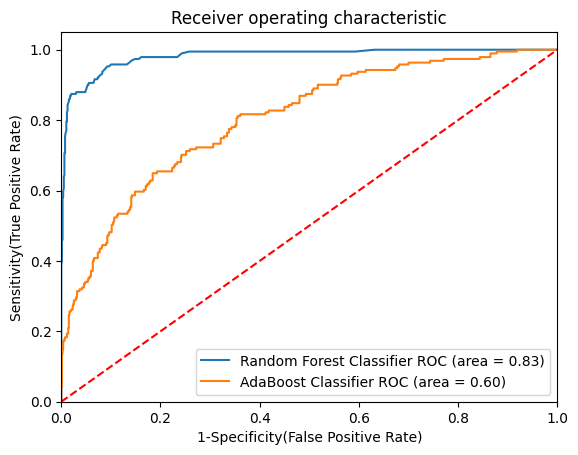

In [41]:
plt.figure()

auc_models = [
    {
        'label' : 'Random Forest Classifier',
        'model' : RandomForestClassifier(n_estimators= 200,
                                            min_samples_split=2,
                                            max_features=7, max_depth=None),
        'auc': 0.8313
    },
    {
        'label' : 'AdaBoost Classifier',
        'model' : AdaBoostClassifier(n_estimators = 90, learning_rate = 1, algorithm = 'SAMME'),
        'auc': 0.6049
    },
]

#create loop through all models
for algo in auc_models:
    model = algo['model']
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)

    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))


# Custom setting for the plot
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()